In [1]:
import seaborn as sns
from openpyxl import Workbook, load_workbook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv('/content/CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
df.shape

(205, 26)

In [6]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [7]:
carcompany = []
for model in df['CarName']:
    carcompany.append(str(model.split(' ')[0]))

df['carcompany'] = np.array(carcompany)

In [9]:
df.CarName=df.CarName.astype('category').cat.codes
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,2,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,alfa-romero
1,2,3,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,alfa-romero
2,3,1,1,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,alfa-romero
3,4,2,4,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,audi
4,5,2,5,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,audi


In [10]:
df.carcompany=df.carcompany.astype('category').cat.codes
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price,carcompany
0,1,3,2,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0,1
1,2,3,3,gas,std,two,convertible,rwd,front,88.6,...,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0,1
2,3,1,1,gas,std,two,hatchback,rwd,front,94.5,...,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0,1
3,4,2,4,gas,std,four,sedan,fwd,front,99.8,...,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0,2
4,5,2,5,gas,std,four,sedan,4wd,front,99.4,...,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0,2


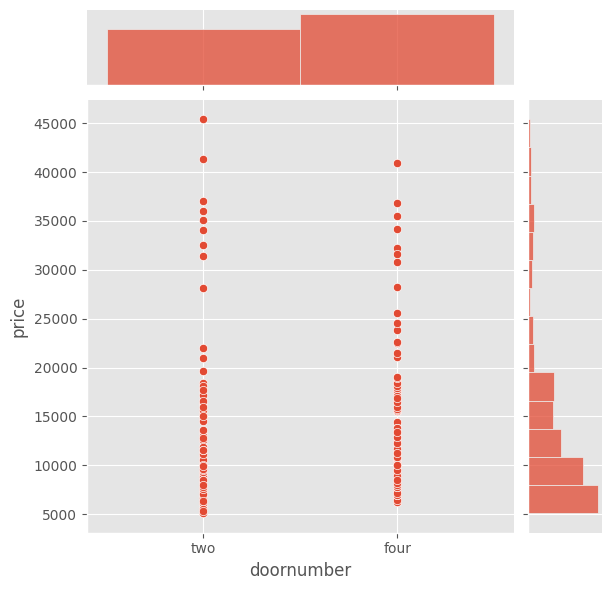

In [14]:
with plt.style.context (('ggplot')):
    sns.jointplot(x=df['doornumber'],y=df['price'],data=df)
    plt.show()

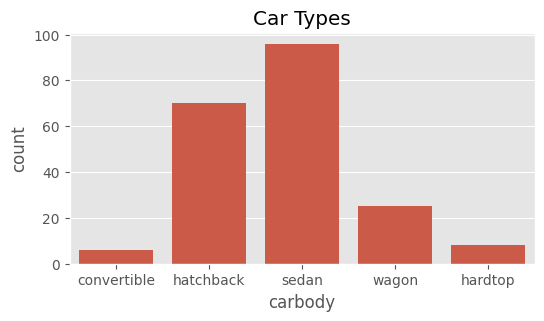

In [15]:
with plt.style.context (('ggplot')):
    plt.figure(figsize=(6,3))
    plt.title('Car Types')
    sns.countplot(data=df,x=df['carbody'])

plt.show()

In [16]:
df.fuelsystem = df.fuelsystem.astype('category').cat.codes
df.fueltype = df.fueltype.astype('category').cat.codes
df.aspiration = df.aspiration.astype('category').cat.codes
df.doornumber = df.doornumber.astype('category').cat.codes
df.carbody = df.carbody.astype('category').cat.codes
df.drivewheel = df.drivewheel.astype('category').cat.codes
df.enginelocation = df.enginelocation.astype('category').cat.codes
df.enginetype = df.enginetype.astype('category').cat.codes
df.cylindernumber = df.cylindernumber.astype('category').cat.codes
df.carcompany = df.carcompany.astype('category').cat.codes

df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    int16  
 3   fueltype          205 non-null    int8   
 4   aspiration        205 non-null    int8   
 5   doornumber        205 non-null    int8   
 6   carbody           205 non-null    int8   
 7   drivewheel        205 non-null    int8   
 8   enginelocation    205 non-null    int8   
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    int8   
 15  cylindernumber    205 non-null    int8   
 16  enginesize        205 non-null    int64  
 1

In [25]:
x = df.drop(['price'], axis=1)
y = df['price']

In [26]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size= 0.8)
lrc = LinearRegression()
lrc.fit(x_train, y_train)

y_pred = lrc.predict(x_test)
rsme = np.sqrt(mean_squared_error(y_test, y_pred))
accu = lrc.score(x_test,y_test)

In [27]:
print(f'The accuracy of the model is {round(accu*100,2)}%')

The accuracy of the model is 79.49%


In [28]:
def accuracy_generator (x, y, split=0.7):
    x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=split)
    lrc=LinearRegression()
    lrc.fit(x_train, y_train)
    y_pred=lrc. predict(x_test)
    r_m_s_e=np.sqrt(mean_squared_error (y_test,y_pred))
    accu=lrc.score(x_test,y_test)
    return r_m_s_e, accu

In [29]:

arr_r_m_s_e = []
arr_accu = []
for i in range (1):
    rmse,ac = accuracy_generator(x, y, split=.85)
    arr_r_m_s_e.append(rmse)
    arr_accu.append(accu)

    print(f'The average rmse is {round(np.average(arr_r_m_s_e),2)}')
    print(f'The accuracy of the model is {round(np.average(arr_accu)*100,2)}%')

The average rmse is 3359.84
The accuracy of the model is 79.49%


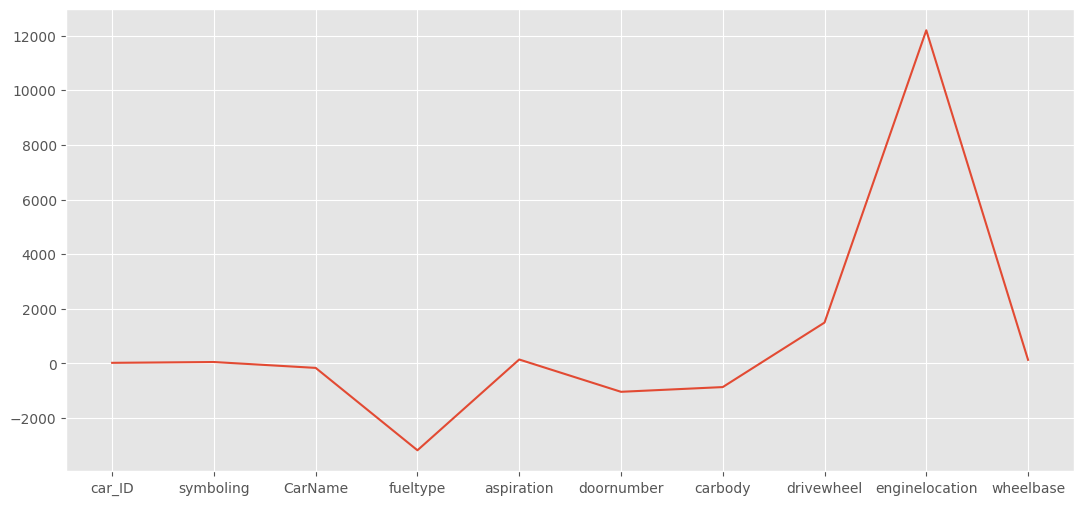

In [33]:
with plt.style.context(('ggplot')):
    plt.figure(figsize=(13,6))
    plt.plot(x_val.columns[:10], model.coef_[:10])
plt.show()